<a href="https://colab.research.google.com/github/ShubhamSS09/Shubham-SS_Rstudio/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data_clean.csv", index_col=0)

In [4]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [5]:
data.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [6]:
#Data structure
data.shape

(158, 9)

In [7]:
#data types
data.dtypes   

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

Above side yoy will the Temp and Month have the wrong data type as Object but instaed of that it should be float or int as there are numeric values
So convert the data type first

##Data Type conversion

In [8]:
data['Month']= pd.to_numeric(data['Month'], errors='coerce')
data['Temp C']= pd.to_numeric(data['Temp C'], errors='coerce')
data['Weather']= data['Weather'].astype('category')

#coerce will introduce NaN values for non numeric data into the columns and whether col has the object but there are 3 categories 
#Category should reflect in 3 different form there thats why the Whether converted into category

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


data type conversions 
[link](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas#:~:text=The%20best%20way%20to%20convert%20one%20or%20more%20columns%20of,floating%2Dpoint%20numbers%20as%20appropriate.)

##Duplicates

In [10]:
#couunt of duplicate rows
data[data.duplicated()].shape

(1, 9)

There is 1 Duplicate row and 9 duplicate columns

In [11]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [12]:
#print that duplicate row 
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [13]:
data_cleaned1= data.drop_duplicates()

In [14]:
data_cleaned1.shape   # here 1 row will be removed from the entire dataset which was duplicate

(157, 9)

##Drop Column

In [15]:
data_cleaned2= data_cleaned1.drop('Temp C', axis=1)  #axis =1 will look particularly in columns

In [16]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


##Data Renaming

In [17]:
#Rename the Solar column has the value Solar. R
data_cleaned3= data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [18]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


##Outlier Detection

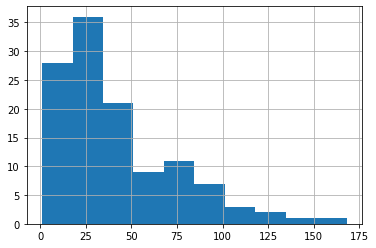

In [19]:
#hisyogram of Ozone
data_cleaned3['Ozone'].hist()

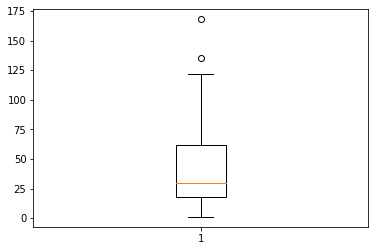

In [20]:
#Box Plot (We don't need NA values)
data_box = data_cleaned3.dropna()
data1_box=data_box.Ozone
plt.boxplot(data1_box)
plt.show()
#Outlayer information

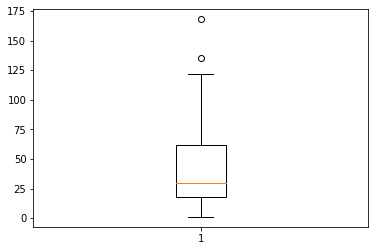

In [21]:
#Extract the Outlayer info
box= plt.boxplot(data1_box)

In [22]:
[item.get_ydata()for item in box['fliers']] #Fliers are the outliers


[array([135., 168.])]

In [23]:
#To get whiskers data (the vertical lines which join ths box plot)
[item.get_ydata()[1]for item in box['whiskers']]

[1.0, 122.0]

In [24]:
#descriptive statistics
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

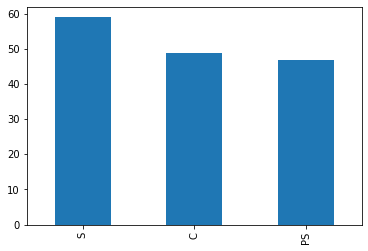

In [25]:
#bar plot
data['Weather'].value_counts().plot.bar()

##Missing Values and Imputation

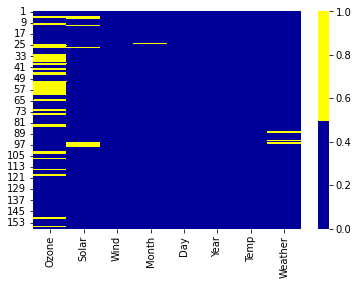

In [26]:
import seaborn as sns
cols = data_cleaned3.columns
colours= ['#000099', '#ffff00'] #This code specify the colours #00099 Yellow & other is Blue
sns.heatmap(data_cleaned3[cols].isnull(),
         cmap=sns.color_palette(colours))   

In [27]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14.3,5.0,5,2010,56,S
6,28.0,NaN,14.9,5.0,6,2010,66,C
10,NaN,194.0,8.6,5.0,10,2010,69,S
11,7.0,NaN,6.9,5.0,11,2010,74,C
24,32.0,92.0,12.0,NaN,24,2010,61,C


In [28]:
data_cleaned3.isnull().sum()  #from above data set this code will give you the values for the 

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [29]:
#Mean Imputation
mean = data_cleaned3['Ozone'].mean()
print(mean)

41.81512605042017


In [30]:
data_cleaned3['Ozone']= data_cleaned3['Ozone'].fillna(mean)
#NA values got filled ny mean value

In [31]:
data_cleaned3.isnull().sum()
#Ozone will have 0 missing values

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [32]:
#Missing value imputation for categorical variable
#get the values first
obj_columns = data_cleaned3[['Weather']]

In [33]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [34]:
obj_columns= obj_columns.fillna(obj_columns.mode().iloc[0])   #iloc is the index value

In [35]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [ ]:
data_cleaned3

In [37]:
obj_columns.shape

(157, 1)

In [39]:
#Joining of two data set - concatination
data_cleaned4= pd.concat([data_cleaned3, obj_columns], axis=1)

In [40]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Weather    0
dtype: int64